In [1]:
# Machine Learning Online Class - Exercise 1: Linear Regression

#  Instructions
#  ------------
#
# This file contains code that helps you get started on the
# linear exercise. You will need to complete the following functions
# in this exericse:

#    warmUpExercise.m
#    plotData.m
#    gradientDescent.m
#    computeCost.m
#    gradientDescentMulti.m
#    computeCostMulti.m
#    featureNormalize.m
#    normalEqn.m

# For this exercise, you will not need to change any code in this file,
# or any other files other than those mentioned above.

#X refers to the population size in 10,000s
#y refers to the profit in $10,000s


#Initialization



Running warmUpExercise ... 

5x5 Identity Matrix: 

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Program paused. Press enter to continue.

Plotting Data ...

Please load the file ex1data1.txt...



Saving ex1data1.txt to ex1data1.txt
Program paused. Press enter to continue.


Testing the cost function ...

With theta = [0 , 0] Cost computed =  32.072733877455676
Expected cost value (approx) 32.07


With theta = [-1 , 2] Cost computed = 54.24245508201238
Expected cost value (approx) 54.24

Program paused. Press enter to continue.


Running Gradient Descent ...

Theta found by gradient descent:
 [-3.63029144  1.16636235]

Expected theta values (approx) 
 -3.6303  1.1664


For population = 35,000, we predict a profit of  4519.767867701768
For population = 70,000, we predict a profit of  45342.45012944714
Program paused. Press enter to continue.

Visualizing J(theta_0, theta_1) ...



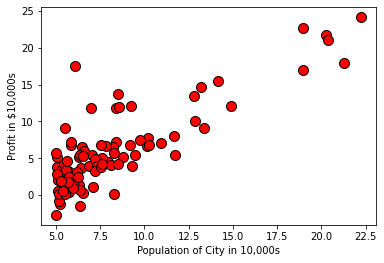

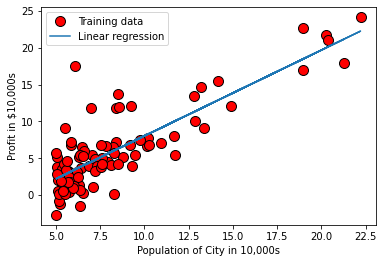

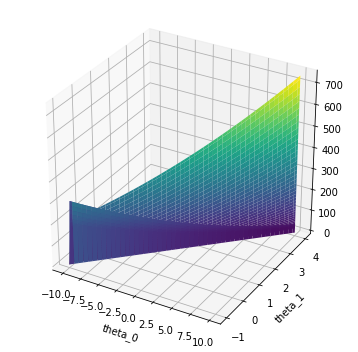

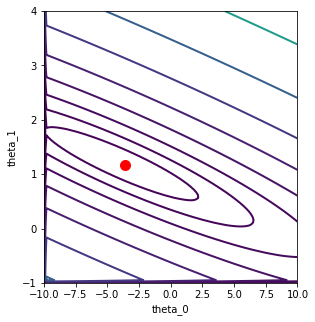

In [2]:
import pandas as pd #python data analysis library
import numpy as np #python scientific library
import keras as ks #python deep learning API
import matplotlib.pyplot as plt #python visualization library
import mpl_toolkits #plot 3d surfaces


def warmUpExercise():
# WARMUPEXERCISE Example function in python
# WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix

# ============= YOUR CODE HERE ==============
# Instructions: Return the 5x5 identity matrix 
  A = np.identity(5);
  print(A);
# ===========================================



#PLOTDATA Plots the data points X and y into a new figure 
#PLOTDATA(x,y) plots the data points with + for the positive examples
#and o for the negative examples. X is assumed to be a Mx2 matrix.
def plotData(X,y):
  #Create New Figure
  # hold on;
  figure = plt.figure(); #open a new figure window

# ====================== YOUR CODE HERE ======================
# Instructions: Plot the training data into a figure using the 
#               "figure" and "plot" commands. Set the axes labels using
#               the "xlabel" and "ylabel" commands. Assume the 
#               population and revenue data have been passed in
#               as the x and y arguments of this function.
#
# Hint: You can use the 'rx' option with plot to have the markers
#       appear as red crosses. Furthermore, you can make the
#       markers larger by using plot(..., 'rx', 'MarkerSize', 10);

  plt.scatter(X,y);
  plt.xlabel('Population of City in 10,000s');
  plt.ylabel('Profit in $10,000s');
  plt.plot(X, y, 'ro', ms=10, mec='k');

# ============================================================



# =================== Part 3: Cost and Gradient descent ===================
def computeCost(X,y,theta):
#COMPUTECOST Compute cost for linear regression
#   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y

# Initialize some useful values
  m = y.size; # number of training examples

# You need to return the following variables correctly 
  J = 0;

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta
#               You should set J to the cost.
# J = ((1/(2*m))*sum(((X*theta) - y).^2)); in octave
  
  temp = np.dot(X,theta)-y;
  J = np.sum(np.power(temp,2))/(2*m);
  return J;
# =========================================================================



def gradientDescent(X, y, theta, alpha, num_iters):
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
   m = y.size; # number of training examples
   J_history = np.zeros((num_iters, 1));
   for iter in range(num_iters):
    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector
    #               theta. 
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (computeCost) and gradient here.
    # theta -= (alpha/m) * (X' * (X*theta-y)) in octave
    temp = np.dot(X,theta)-y;
    error = np.dot(X.transpose(), temp);
    theta-=((alpha/m) * error);   

    # Save the cost J in every iteration   
    J_history[iter] = computeCost(X, y, theta); 
   return theta;
   
   # ============================================================
 
   


# ==================== Part 1: Basic Function ====================
# Complete warmUpExercise
print('Running warmUpExercise ... \n');
print('5x5 Identity Matrix: \n');
warmUpExercise();

print('Program paused. Press enter to continue.\n');
#pause;


# ======================= Part 2: Plotting =======================

print('Plotting Data ...\n');

#The file ex1data1.txt contains the dataset for our linear regression problem.
#The first column is the population of a city and the second column is the profit of a food truck in that city.
#A negative value for profit indicates a loss.
print('Please load the file ex1data1.txt...\n');
from google.colab import files
path_to_file = list(files.upload().keys())[0];
data = np.loadtxt(path_to_file,delimiter=',',usecols=(0,1),unpack=True); #Read in comma separated data

X = data[0];
y = data[1];
m = y.size; # number of training examples

# Plot Data
# Note: You have to complete the code in plotData
plotData(X,y);

print('Program paused. Press enter to continue.\n');
#pause;


X = np.stack([np.ones(m), X], axis=1);
theta = np.zeros((2)); #initialize fitting parameters

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

print('\nTesting the cost function ...\n');
# compute and display initial cost

J = computeCost(X, y, theta);

print('With theta = [0 , 0] Cost computed = ',J);
print('Expected cost value (approx) 32.07\n');

# further testing of the cost function
J = computeCost(X, y, [-1 , 2]);
print('\nWith theta = [-1 , 2] Cost computed =', J);
print('Expected cost value (approx) 54.24\n');

print('Program paused. Press enter to continue.\n');
#pause;
print('\nRunning Gradient Descent ...\n');
# run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:\n', theta); 
print('\nExpected theta values (approx) ');
print(' -3.6303  1.1664\n\n');

# Plot the linear fit
#hold on; # keep previous plot visible
plotData(X[:,1],y);
plt.plot(X[:,1], np.dot(X,theta), '-');
plt.legend(['Training data', 'Linear regression']);
#hold off # don't overlay any more plots on this figure

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1,3.5],theta);
print('For population = 35,000, we predict a profit of ',predict1*10000);
predict2 = np.dot([1, 7],theta);
print('For population = 70,000, we predict a profit of ',predict2*10000);

print('Program paused. Press enter to continue.\n');
#pause;


# ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0],theta1_vals.shape[0]));

# Fill out J_vals
for i in range(1,theta0_vals.size):
    for j in range(1,theta1_vals.size):
	    t = [theta0_vals[i], theta1_vals[j]];
	    J_vals[i,j] = computeCost(X, y, t);
  

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.transpose();
# Surface plot
fig = plt.figure();
# changing the size of figure to 5x10
fig.set_figheight(5);
fig.set_figwidth(10);
ax = fig.add_subplot(121,projection = '3d');
plt.xlabel('theta_0'); 
plt.ylabel('theta_1');
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap = 'viridis'); # viridis colormap
fig.tight_layout();


# Contour plot
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
fig = plt.figure();
fig.set_figwidth(10);
fig.set_figheight(5);
ax = plt.subplot(122);
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2,cmap = 'viridis', levels = np.logspace(-2, 3, 20));
plt.xlabel('theta_0'); 
plt.ylabel('theta_1');
#hold on;
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2); #marker size = 10 and linewidth = 2
